# 0. A List of APIs of Pandas

- Series
 - Constructor: Series()
 - Attributes: Series.index, Series.values, Series.dtype
 - Conversion: Series.astype(), Series.infer_objects() 
 - Indexing, Iteration: Series.get(), Series.at, Series.loc, Series.items()
 - Categorical: Categorical.dtype, Categorical.codes    
   
- DataFrame
 - Constructor: DataFrame()
 - Attributes, Underlying Data: DataFrame.index, DataFrame.columns, DataFrame.dtypes, DataFrame.values
 - Conversion: DataFrame.astype(), DataFrame.copy(), DataFrame.isna(), DataFrame.bool()
 - Indexing, Iteration: DataFrame.head(), DataFrame.at, DataFrame.loc
 - Binary Operator Functions: DataFrame.add(), DataFrame.sub(), DataFrame.mul(), DataFrame.div()

- Index
 - Attributes: Index.values, index.is_monotonic
 - Modifying and Computations: Index.all(), Index.any(), Index.argmin()
 - Missing Values: Index.fillna(), Index.dropna(), Index.isna()
 - Conversion: Index.astype(), Index.item(), Index.tolist()

- Scalars
 - Period: Period
 - Attributes: Period.day, Period.dayofweek, Period.freq
 - Methods: period.asfreq, Period.now
 - Timestamp: Timestamp
 - Properties: Timestamp.asm8, Timestamp.day, Timestamp.hour
 - Methods: Timestamp.ceil, Timestamp.astimezone



---



# 1. Basics



- Data Structure

 - **Numpy**: containing of a single cell
 - **Series**: containing of a single column
 - **Dataframe**: a group of multiple serieses

In [161]:
import pandas as pd
from pandas import Series, DataFrame

In [162]:
fruit = Series([2500, 3800, 1200, 6000], index=['apple', 'banana', 'peer', 'cherry'])
fruit

apple     2500
banana    3800
peer      1200
cherry    6000
dtype: int64

In [163]:
print("values: ", fruit.values)
print("index: ", fruit.index)

values:  [2500 3800 1200 6000]
index:  Index(['apple', 'banana', 'peer', 'cherry'], dtype='object')


# 2. Series

In [164]:
# Create a Dictionary
fruitData = {'apple': 2500, 'banana': 3800, 'peer': 1200, 'cherry': 6000}
#print(type(fruitData))

In [165]:
# Change Dictionary to Series
fruit = Series(fruitData)
#print(type(fruit))
print(fruit)

apple     2500
banana    3800
peer      1200
cherry    6000
dtype: int64


In [166]:
# Naming
fruit.name = 'fruitPrice'
fruit.index.name = 'fruitName'
print(fruit.name)
print(fruit.index.name)

fruitPrice
fruitName


# 3. DataFrame

In [167]:
# DataFrame = a group of multiple Serieses

In [168]:
fruitData = { 'fruitName': ['apple', 'banana', 'peer', 'cherry'], 
              'fruitPrice': [ 2500, 3800, 1200, 6000], 
              'num': [10, 5, 8, 3]
            }
print(fruitData)

{'fruitName': ['apple', 'banana', 'peer', 'cherry'], 'fruitPrice': [2500, 3800, 1200, 6000], 'num': [10, 5, 8, 3]}


In [169]:
DataFrame(fruitData)

,fruitName,fruitPrice,num
0,apple,2500,10
1,banana,3800,5
2,peer,1200,8
3,cherry,6000,3


## 3.1. Order by Column

In [170]:
# Order by column 
# DataFrame(data, columns = [order])
fruitFrame = DataFrame(fruitData, columns = ['fruitPrice', 'num', 'fruitName'])
fruitFrame

,fruitPrice,num,fruitName
0,2500,10,apple
1,3800,5,banana
2,1200,8,peer
3,6000,3,cherry


## 3.2. Extract Specific Columns

In [171]:
# by Column
fruitFrame['fruitName']

0     apple
1    banana
2      peer
3    cherry
Name: fruitName, dtype: object

In [172]:
# by attribute
fruitFrame.fruitName

0     apple
1    banana
2      peer
3    cherry
Name: fruitName, dtype: object

In [173]:
# Add a new column with the '2023' as a default value for the column
fruitFrame['Year'] = 2023
fruitFrame

,fruitPrice,num,fruitName,Year
0,2500,10,apple,2023
1,3800,5,banana,2023
2,1200,8,peer,2023
3,6000,3,cherry,2023


In [174]:
variable = Series([4, 2, 1], index = [0, 2, 3])  # -> No value for Index '1'
fruitFrame['stock'] = variable
fruitFrame # Result: No value for the Index '1' in the Series 

,fruitPrice,num,fruitName,Year,stock
0,2500,10,apple,2023,4.0
1,3800,5,banana,2023,NaN
2,1200,8,peer,2023,2.0
3,6000,3,cherry,2023,1.0


## 3.3. Delete Data by Row

In [175]:
fruit = Series([2500, 3800, 1200, 6000], 
               index = ['apple', 'banana', 'peer', 'cherry'])

In [176]:
# Delete a row
new_fruit = fruit.drop('banana')  # Drop the row 'banana' -> copy the result to make a new Series 
new_fruit

apple     2500
peer      1200
cherry    6000
dtype: int64

In [177]:
# Delete a single data 
fruit['banana'] = 0
print(fruit)
fruit['banana'] = 3800
print(fruit)

apple     2500
banana       0
peer      1200
cherry    6000
dtype: int64
apple     2500
banana    3800
peer      1200
cherry    6000
dtype: int64


In [178]:
fruitData['fruitName']

['apple', 'banana', 'peer', 'cherry']

In [179]:
# Create a new DataFrame 
fruitFrame = DataFrame(fruitData, 
                       index = fruitData['fruitName'], 
                       columns = ['fruitPrice', 'num'])
fruitFrame

,fruitPrice,num
apple,2500,10
banana,3800,5
peer,1200,8
cherry,6000,3


In [180]:
# Delete rows 'apple' and 'banana'
fruitFrame.drop(['apple', 'banana'])

# Notes:
# 'drop' is to delete data or rows in the original dataframe,
# just makes a view of the result

# Notes:
# If the result is needed, make a new dataframe to get the result

,fruitPrice,num
peer,1200,8
cherry,6000,3


## 3.4. Delete Data by Columns

In [181]:
fruitFrame.drop('num', axis = 1)  

,fruitPrice
apple,2500
banana,3800
peer,1200
cherry,6000


## 3.5. Slicing DataFrame

In [182]:
fruitFrame[:]  # '[:]' means all rows and all columns

,fruitPrice,num
apple,2500,10
banana,3800,5
peer,1200,8
cherry,6000,3


In [183]:
# Notes
# Nunber type of Index: the index is not included 
#                       e.g. [1:5] -> 1, 2, 3, 4
# String type of Index: the index is included
#                       e.g. dataframe = [apple, banana, mango, watermelon, kiwi]
#                            [apple:mango] -> apple, banana, mango

In [184]:
fruitFrame['banana':]  # [Start:] -> from 'start value' to the end 

,fruitPrice,num
banana,3800,5
peer,1200,8
cherry,6000,3


In [185]:
fruitFrame[:'cherry']  # [:End] -> from the beginning to the 'end value'

,fruitPrice,num
apple,2500,10
banana,3800,5
peer,1200,8
cherry,6000,3


# 4. Basic Operations

In [186]:
# Make Serieses
fruit1 = Series([5, 9, 10, 3], index = ['apple', 'banana', 'cherry', 'peer'])
fruit2 = Series([3, 2, 9, 5, 10], index = ['apple', 'orange', 'banana', 'cherry', 'mango'])

In [187]:
# Operation
fruit1 + fruit2  # Result: Combining two swo serieses only having common index

apple      8.0
banana    18.0
cherry    15.0
mango      NaN
orange     NaN
peer       NaN
dtype: float64

In [188]:
# Make Dictionaries
fruitData1 = {'Ohio': [4, 8, 3, 5], 'Texas': [0, 1, 2, 3]}
fruitData2 = {'Ohio': [3, 0, 2, 1, 7], 'Colorado': [5, 4, 3, 6, 0]}

In [189]:
# fruitData1 + fruitData2  # Being not able to combine two Dictionaries -> Need to transform to the DataFrame type

In [190]:
# Change a type from Dictionary to DataFrame
fruitFrame1 = DataFrame(fruitData1,   # Original Data (Dictionary type)
                        columns = ['Ohio', 'Texas'],   # Sen an order for columns
                        index = ['apple', 'banana', 'cherry', 'peer'])  # Set values of index
fruitFrame1

,Ohio,Texas
apple,4,0
banana,8,1
cherry,3,2
peer,5,3


In [191]:
fruitFrame2 = DataFrame(fruitData2,
                        columns = ['Ohio', 'Colorado'], 
                        index = ['apple', 'orange','banana', 'cherry', 'mango'])
fruitFrame2

,Ohio,Colorado
apple,3,5
orange,0,4
banana,2,3
cherry,1,6
mango,7,0


In [192]:
fruitFrame1 + fruitFrame2  # Result: Combining two swo serieses only having common index

,Colorado,Ohio,Texas
apple,NaN,7.0,NaN
banana,NaN,10.0,NaN
cherry,NaN,4.0,NaN
mango,NaN,NaN,NaN
orange,NaN,NaN,NaN
peer,NaN,NaN,NaN


# 5. Sort Data

## 5.1. Sort Data: Series 

In [193]:
# Make a Series
fruit = Series([2500, 3800, 1200, 6000], 
               index=['apple', 'banana', 'peer', 'cherry'])
fruit

apple     2500
banana    3800
peer      1200
cherry    6000
dtype: int64

In [194]:
fruit.sort_values  # Order by value
fruit.sort_values(ascending = True) # Order by ascending order

peer      1200
apple     2500
banana    3800
cherry    6000
dtype: int64

In [195]:
fruit.sort_values(ascending = False) # Order by descending order

cherry    6000
banana    3800
apple     2500
peer      1200
dtype: int64

In [196]:
fruit.sort_index # Order by Index

<bound method Series.sort_index of apple     2500
banana    3800
peer      1200
cherry    6000
dtype: int64>

## 5.2. Sort Data: DataFrame

In [197]:
# Check the Series 'fruitData'
fruitData

{'fruitName': ['apple', 'banana', 'peer', 'cherry'],
 'fruitPrice': [2500, 3800, 1200, 6000],
 'num': [10, 5, 8, 3]}

In [198]:
# Make 'fruitName' index
fruitName = fruitData['fruitName']
fruitName

['apple', 'banana', 'peer', 'cherry']

In [199]:
# Make a new DataFrame
fruitFrame = DataFrame(fruitData, 
                       index = fruitName, 
                       columns = ['num', 'fruitPrice'])
fruitFrame

,num,fruitPrice
apple,10,2500
banana,5,3800
peer,8,1200
cherry,3,6000


In [200]:
# Order by Index with ascending order
fruitFrame.sort_index(ascending = True)

,num,fruitPrice
apple,10,2500
banana,5,3800
cherry,3,6000
peer,8,1200


In [201]:
# Order by Value with specific orders
fruitFrame.sort_values(by = ['fruitPrice', 'num'],  # First rule: 'fruitPrice, Second rule: 'num'
                       ascending = [False, True])  # Order by Ascending and Descending for each value

,num,fruitPrice
cherry,3,6000
banana,5,3800
apple,10,2500
peer,8,1200


# 6. Basic Analysis: Technical Statistics

In [202]:
# count      Count all values but NA excluded
# min, max   Min, Max
# sum        Sum
# comprod    Comprod cumulative sum
# mean       Average
# median     Median
# quantile   Quantile
# var        Sample Variance
# std        Standard Deviation
# describe   Summary of statistics

In [203]:
# Load a 'csv' file from 'pandas' libraries to DataFrame 'df'
german_sample = pd.read_csv('http://freakonometrics.free.fr/german_credit.csv')  
#type(german_sample)

In [204]:
german_sample

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


In [205]:
# Check names of columns
german_sample.columns.values

array(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'], dtype=object)

In [206]:
# Get column names as a list
german_sample_list = german_sample.columns.values
german_sample_list

array(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'], dtype=object)

In [207]:
# Print given columns
german = german_sample[['Creditability', 
                        'Duration of Credit (month)',
                        'Purpose',
                        'Credit Amount']]
german

,Creditability,Duration of Credit (month),Purpose,Credit Amount
0,1,18,2,1049
1,1,9,0,2799
2,1,12,9,841
3,1,12,0,2122
4,1,12,0,2171
...,...,...,...,...
995,0,24,3,1987
996,0,24,0,2303
997,0,21,0,12680
998,0,12,3,6468


In [208]:
# Min
german.min()

Creditability                   0
Duration of Credit (month)      4
Purpose                         0
Credit Amount                 250
dtype: int64

In [209]:
# Max
german.max()

Creditability                     1
Duration of Credit (month)       72
Purpose                          10
Credit Amount                 18424
dtype: int64

In [210]:
# Average
german.mean()

Creditability                    0.700
Duration of Credit (month)      20.903
Purpose                          2.828
Credit Amount                 3271.248
dtype: float64

In [211]:
# describe: An Attribute
# describe(): A Method

In [212]:
# Show sample data
german.describe # => 'Attribute type': Show some data as a sample

<bound method NDFrame.describe of      Creditability  Duration of Credit (month)  Purpose  Credit Amount
0                1                          18        2           1049
1                1                           9        0           2799
2                1                          12        9            841
3                1                          12        0           2122
4                1                          12        0           2171
..             ...                         ...      ...            ...
995              0                          24        3           1987
996              0                          24        0           2303
997              0                          21        0          12680
998              0                          12        3           6468
999              0                          30        2           6350

[1000 rows x 4 columns]>

In [213]:
# Overall statistics
german.describe() # => 'Method type': Show an overview of statistics

,Creditability,Duration of Credit (month),Purpose,Credit Amount
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.700000,20.903000,2.828000,3271.24800
std,0.458487,12.058814,2.744439,2822.75176
min,0.000000,4.000000,0.000000,250.00000
25%,0.000000,12.000000,1.000000,1365.50000
50%,1.000000,18.000000,2.000000,2319.50000
75%,1.000000,24.000000,3.000000,3972.25000
max,1.000000,72.000000,10.000000,18424.00000


# 7. Correlation 

In [214]:
# Make a DataFrame
german = german_sample[['Duration of Credit (month)',
                        'Credit Amount',
                        'Age (years)']]   # List type
german

,Duration of Credit (month),Credit Amount,Age (years)
0,18,1049,21
1,9,2799,36
2,12,841,23
3,12,2122,39
4,12,2171,38
...,...,...,...
995,24,1987,21
996,24,2303,45
997,21,12680,30
998,12,6468,52


In [215]:
# Print the five rows of the DataFrame
german.head()

,Duration of Credit (month),Credit Amount,Age (years)
0,18,1049,21
1,9,2799,36
2,12,841,23
3,12,2122,39
4,12,2171,38


In [216]:
# Check the correlations
german.corr()

,Duration of Credit (month),Credit Amount,Age (years)
Duration of Credit (month),1.000000,0.624988,-0.037550
Credit Amount,0.624988,1.000000,0.032273
Age (years),-0.037550,0.032273,1.000000


# 8. GroupBy 

In [217]:
# Make a DataFrame
german = german_sample[['Credit Amount', 'Type of apartment']]
german.head()

,Credit Amount,Type of apartment
0,1049,1
1,2799,1
2,841,1
3,2122,1
4,2171,2


In [218]:
# View data by group

german_grouped = german['Credit Amount'].groupby(german['Type of apartment'])  
#             DataFrame[Certain columns].groupby(DataFrame[Columns to group by])

In [219]:
# Average
german_grouped.mean()

Type of apartment
1    3122.553073
2    3067.257703
3    4881.205607
Name: Credit Amount, dtype: float64

In [220]:
# Make another DataFrame
german = german_sample[['Credit Amount', 'Type of apartment', 'Purpose']]
german.head()

,Credit Amount,Type of apartment,Purpose
0,1049,1,2
1,2799,1,0
2,841,1,9
3,2122,1,0
4,2171,2,0


In [221]:
# Multiple Groups
german_group2 = german['Credit Amount'].groupby([german['Purpose'],
                                                 german['Type of apartment']])  # List type
german_group2.mean()

Purpose  Type of apartment
0        1                    2597.225000
         2                    2811.024242
         3                    5138.689655
1        1                    5037.086957
         2                    4915.222222
         3                    6609.923077
2        1                    2727.354167
         2                    3107.450820
         3                    4100.181818
3        1                    2199.763158
         2                    2540.533040
         3                    2417.333333
4        1                    1255.500000
         2                    1546.500000
5        1                    1522.000000
         2                    2866.000000
         3                    2750.666667
6        1                    3156.444444
         2                    2492.423077
         3                    4387.266667
8        1                     902.000000
         2                    1243.875000
9        1                    5614.125000
       

## 8.1. Group in 'for' Statement

In [222]:
# Make a DataFrame
german = german_sample[['Type of apartment',
                       'Sex & Marital Status',
                       'Credit Amount']]
german.head()

,Type of apartment,Sex & Marital Status,Credit Amount
0,1,2,1049
1,1,3,2799
2,1,2,841
3,1,3,2122
4,2,3,2171


In [223]:
# use 'for' Statement
for g in german.groupby('Type of apartment'):
  print(g)
  print('------------------------------------------------------------')

(1,      Type of apartment  Sex & Marital Status  Credit Amount
0                    1                     2           1049
1                    1                     3           2799
2                    1                     2            841
3                    1                     3           2122
5                    1                     3           2241
..                 ...                   ...            ...
983                  1                     2           1882
989                  1                     2           2718
993                  1                     2           3966
994                  1                     3           6199
995                  1                     3           1987

[179 rows x 3 columns])
------------------------------------------------------------
(2,      Type of apartment  Sex & Marital Status  Credit Amount
4                    2                     3           2171
6                    2                     3           3398
7     

In [224]:
for type, g in german.groupby('Type of apartment'):
  print(g.head(n = 3))  

   Type of apartment  Sex & Marital Status  Credit Amount
0                  1                     2           1049
1                  1                     3           2799
2                  1                     2            841
   Type of apartment  Sex & Marital Status  Credit Amount
4                  2                     3           2171
6                  2                     3           3398
7                  2                     3           1361
    Type of apartment  Sex & Marital Status  Credit Amount
29                  3                     3           4796
44                  3                     3           1239
69                  3                     3           2032


# 9. Seaborn Package 

In [225]:
# Import Seaborn module
import seaborn as sns

In [226]:
# Load 'planets' dataset from 'seaborn' libraries
planets = sns.load_dataset('planets')
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [227]:
# Check a shape of the dataset
planets.shape  # Result: (the number of rows, the number of columns)

(1035, 6)

In [228]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [229]:
# Drop NaN
planets.dropna()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


In [230]:
# Check an overview of the dataset whether it's still valid after dropping na values
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


# 10. Practice: 'Bird' Dataset

## 10.1. Preparation

In [231]:
# Load 'Bird' dataset
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')
births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [232]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [233]:
births.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [234]:
births.dropna().describe()

,year,month,day,births
count,15067.000000,15067.000000,15067.000000,15067.000000
mean,1978.417402,6.516427,17.769894,4678.631513
std,5.762018,3.449554,15.284034,1003.104707
min,1969.000000,1.000000,1.000000,1.000000
25%,1973.000000,4.000000,8.000000,4344.000000
50%,1978.000000,7.000000,16.000000,4785.000000
75%,1983.000000,10.000000,24.000000,5247.000000
max,1988.000000,12.000000,99.000000,6527.000000


In [235]:
# Get a new value 'decade' from the 'year' column
births['year'] // 10   
births['year'] // 10 * 10 # Calculate 'decade'

0        1960
1        1960
2        1960
3        1960
4        1960
         ... 
15542    2000
15543    2000
15544    2000
15545    2000
15546    2000
Name: year, Length: 15547, dtype: int64

In [236]:
# Add a new column 'decade' to the dataset
births['decade'] = births['year'] // 10 * 10
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


## 10.2. Draw Graphs

In [237]:
# Prepare the dataset using 'pivot table' 

# df.pivot_table(df, index, columns, function)
births.pivot_table('births',            
                   index = 'decade',    # index
                   columns = 'gender',  # columns
                   aggfunc = 'sum')     # agrregation function

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


<Axes: xlabel='decade'>

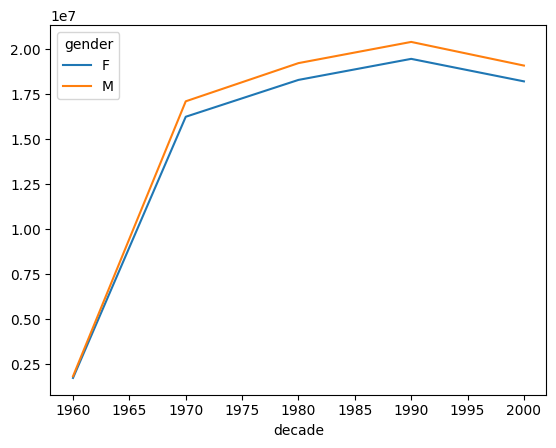

In [238]:
# Draw a graph: 'Decade'
births.pivot_table('births',
                    index = 'decade',    # x-axis
                    columns = 'gender',  # y-axis
                    aggfunc = 'sum').plot()


<Axes: xlabel='year'>

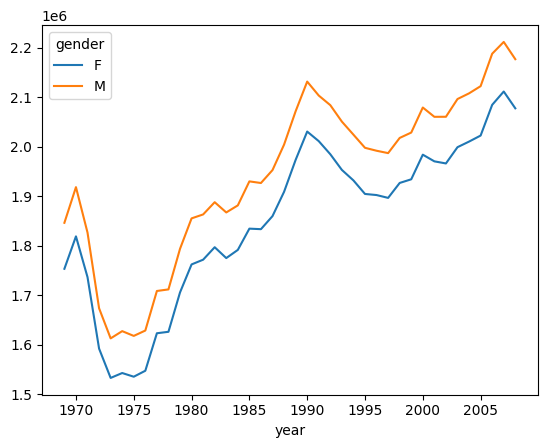

In [239]:
# Draw a graph: 'Year'
births.pivot_table('births',
                   index = 'year',      # x-axis
                   columns = 'gender',  # y-axis
                   aggfunc = 'sum').plot()